In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pbn import operations as ops
%matplotlib inline

In [30]:
import matplotlib.image as matimg
#img_d = matimg.imread('/Users/eczech/Downloads/google.png')
img_d = matimg.imread('/Users/eczech/Downloads/asimov.png')

img_d.shape

(1098, 1467, 3)

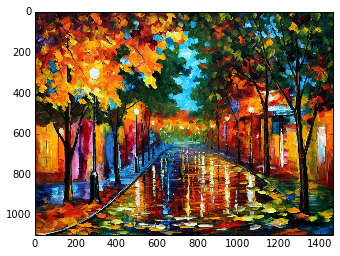

In [31]:
plt.imshow(img_d)

In [32]:
colors = ops.unravel(img_d)
colors.head()

,R,G,B
0,32,12,21
1,33,13,22
2,32,15,23
3,33,18,25
4,35,20,27


In [33]:
preds = ops.cluster_color_space(colors, max_clusters=20)
preds.value_counts()

1     176398
2     126365
12    121897
3     119903
13     94124
8      93409
0      88935
18     87978
10     85894
15     74460
19     73647
7      65142
11     64877
16     62191
4      55645
14     52054
17     43905
9      43874
6      42748
5      37320
dtype: int64

In [34]:
res = pd.concat([preds, colors], axis=1)
res = res.rename(columns={0: 'C'})
clusters = res.groupby('C').mean().applymap(lambda x: int(np.round(x)))
clusters.head()

,R,G,B
C,,,
0,188,63,18
1,14,34,28
2,48,22,15
3,72,66,35
4,168,107,71


In [36]:
merged = res.merge(clusters, left_on='C', right_index=True, suffixes=['', '_mean'])
merged.head()

,C,R,G,B,R_mean,G_mean,B_mean
0,2,32,12,21,48,22,15
1,2,33,13,22,48,22,15
2,2,32,15,23,48,22,15
3,2,33,18,25,48,22,15
4,2,35,20,27,48,22,15


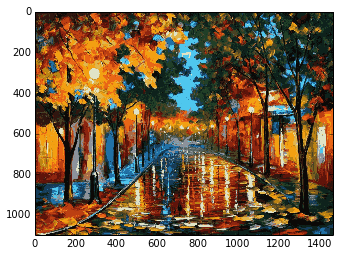

In [37]:
img_recon = ops.reravel(merged[[c for c in merged.columns if 'mean' in c]], *img_d.shape[0:2])
plt.imshow(img_recon / float(255))

In [38]:
img_cl = ops.reravel(merged[['C']], img_d.shape[0], img_d.shape[1])
img_cl = np.reshape(img_cl, img_d.shape[0:2])
img_cl.shape

(1098, 1467)

In [39]:
cls = ops.cluster_euclidean_space(np.int64(img_cl))
len(cls)

20

In [40]:
[len(c) for c in cls.values()]

[4643,
 6441,
 6751,
 10884,
 9564,
 6872,
 1684,
 4162,
 6195,
 1880,
 1399,
 3079,
 5801,
 4892,
 5361,
 2619,
 5357,
 860,
 8122,
 8716]

In [52]:
import imp
imp.reload(ops)

<module 'pbn.operations' from '/Users/eczech/repo/portfolio/functional/paint_by_numbers/python/pbn/operations.py'>

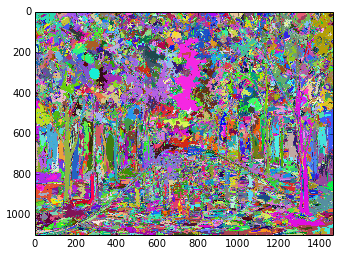

In [41]:
img_reassembled = ops.image_from_clusters(cls, clusters, img_d, use_random_color=True)
plt.imshow(img_reassembled)

In [42]:
fc = ops.get_cluster_props(cls, clusters, img_d)

In [25]:
[ len(fc[cc_id]) for cc_id in fc]

[14, 299, 287, 85, 37, 1, 75, 8, 18, 3]

In [26]:
fc.keys()

[5, 6, 8, 9, 13, 14, 15, 17, 18, 19]

In [119]:
cl1 = fc[0][0]
len(cl1['points']), len(cl1['edges']), cl1['color'], len(cl1['labels'])

(7921, 1403, R     20
 G    159
 B     92
 Name: 0, dtype: int64, 2781)

In [63]:
img_edge = ops.render_pbn(fc, img_d, edg=[.97,.97,.97], size_limit=1)

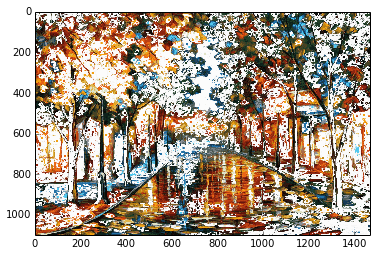

In [64]:
plt.imshow(img_edge, aspect='auto')

In [66]:
matimg.imsave('/tmp/pbn_test.png', img_edge)